In [1]:
## importing essential libraries

import pandas as pd
import numpy as np


In [2]:
## to read csv file

file_path = r'C:\Users\suraj\Downloads\Amazon_Reviews.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
## to see shape of file

df.head(5)

,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2.0,1.0,2.0,5.0,1.0,3.0,3.0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1.0,5.0,1.0,3.0,1.0,2.0,1.0,Good work life balance and team building exerc...,No job security. They will cut you out any-day...
2,Customer Support Associate (working remotely),NaN,Full Time,Customer Success Department,8 Aug 2023,1.0,2.0,1.0,2.0,1.0,2.0,3.0,"good about this company, provides virtual roles","this company is really bad , no job security ,..."
3,Sds Associate (working remotely),NaN,Full Time,Non Voice Department,7 Aug 2023,2.0,3.0,2.0,2.0,2.0,2.0,2.0,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...
4,Software Developer,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,7 Aug 2023,4.0,3.0,4.0,5.0,3.0,4.0,3.0,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.


In [4]:
## droping unnecessary columns

df1=df.drop(['Place','Job_type','Date','Name','Department','Likes','Dislikes'], axis=1)

In [5]:
df1.head(5)

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
0,2.0,1.0,2.0,5.0,1.0,3.0,3.0
1,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2,1.0,2.0,1.0,2.0,1.0,2.0,3.0
3,2.0,3.0,2.0,2.0,2.0,2.0,2.0
4,4.0,3.0,4.0,5.0,3.0,4.0,3.0


In [6]:
## importing graph essential libraries

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Overall_rating', ylabel='count'>

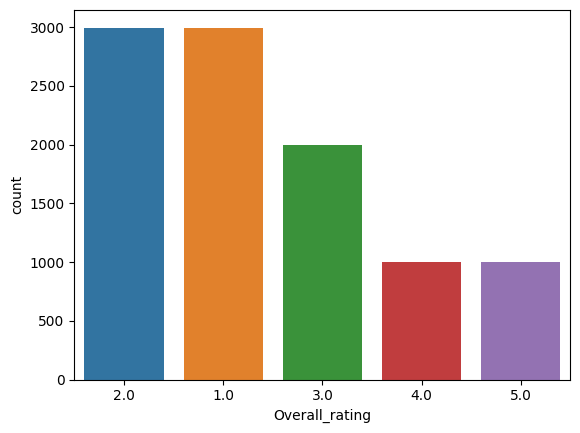

In [7]:
## to see count of overall rating column

sns.countplot(data=df1,
              x='Overall_rating',
              order=df1.Overall_rating.value_counts().index)

In [9]:
## importing as dataframe
df2 = pd.DataFrame(df1)
correlation_matrix = df2.corr()


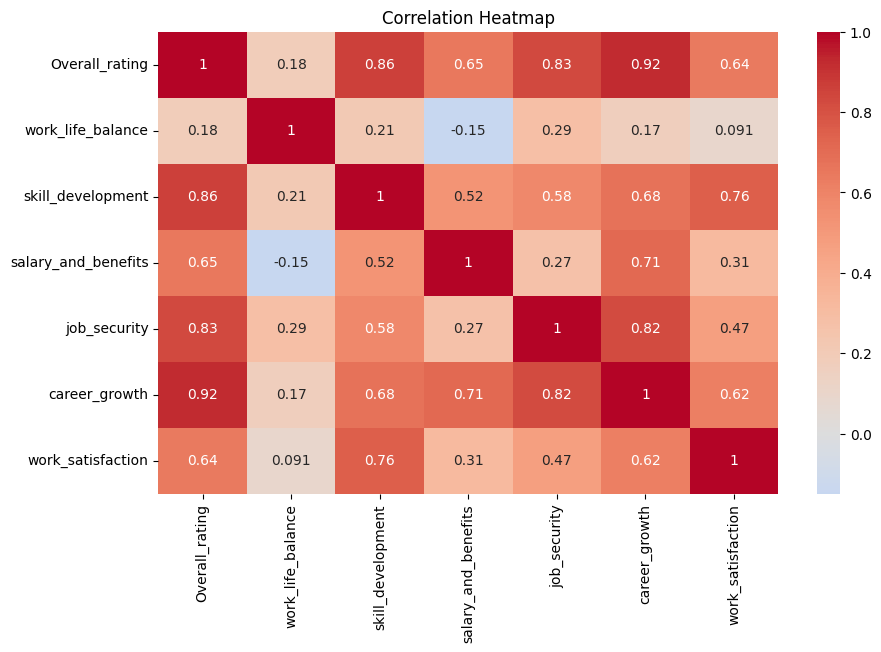

In [10]:
## this is Correlation Heatmap to check dependent features

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
## dropping unnecessary columns

df3=df.drop(['Place','Job_type','Date','Name','Department','Overall_rating','work_life_balance','skill_development','salary_and_benefits','job_security','career_growth','work_satisfaction'], axis=1)

In [12]:
df3.head(5)

,Likes,Dislikes
0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...
1,Good work life balance and team building exerc...,No job security. They will cut you out any-day...
2,"good about this company, provides virtual roles","this company is really bad , no job security ,..."
3,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...
4,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.


In [15]:
# Combine the text data from both columns

df3['text'] = df3['Likes'] + ' ' + df3['Dislikes']

In [16]:
df3.head(5)

,Likes,Dislikes,text
0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...,The office is great and you have best in indus...
1,Good work life balance and team building exerc...,No job security. They will cut you out any-day...,Good work life balance and team building exerc...
2,"good about this company, provides virtual roles","this company is really bad , no job security ,...","good about this company, provides virtual role..."
3,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...,Leaves are there but more than policy it will ...
4,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.,Amazon has high standard when it comes to runn...


In [17]:
# Create sentiment labels based on the "like" and "dislike" columns
## 0+0=0 OR 0+1=1

def determine_sentiment(row):
    if "not" in row['text']:
        return 0
    elif "Not" in row['text']:
        return 0
    else:
        return 1  # Indicating uncertain sentiment

In [18]:
df3['sentiment'] = df3.apply(determine_sentiment, axis=1)

In [19]:
df3.head(3)

,Likes,Dislikes,text,sentiment
0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...,The office is great and you have best in indus...,0
1,Good work life balance and team building exerc...,No job security. They will cut you out any-day...,Good work life balance and team building exerc...,1
2,"good about this company, provides virtual roles","this company is really bad , no job security ,...","good about this company, provides virtual role...",0


In [20]:
# Drop the original "like" and "dislike" columns

df4=df3.drop(['Likes','Dislikes'], axis=1)

In [21]:
df4.head(2)

,text,sentiment
0,The office is great and you have best in indus...,0
1,Good work life balance and team building exerc...,1


In [22]:
## importing essential libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df4['text'], df4['sentiment'], test_size=0.2, random_state=42)

In [25]:
# TF-IDF vectorization

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
# Model training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [27]:
# Model evaluation

predictions = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [29]:
# Example predictions 

example_texts = ["This is not great and amazing", "I dislike it"]
example_texts_tfidf = tfidf_vectorizer.transform(example_texts)
example_predictions = model.predict(example_texts_tfidf)
for text, prediction in zip(example_texts, example_predictions):
    sentiment = "like" if prediction == 1 else "dislike"
    print(f"Text: {text} | Predicted Sentiment: {sentiment}")

Text: This is not great and amazing | Predicted Sentiment: dislike
Text: I dislike it | Predicted Sentiment: dislike
